# Iris Flower Dataset Neural Network 
##### **A Statquest implementation of [Neural Networks Pt. 4: Multiple Inputs and Outputs](https://www.youtube.com/watch?v=83LYR-1IcjA&list=PLblh5JKOoLUIxGDQs4LFFD--41Vzf-ME1&index=9)**


![iris_dataset image.png](<attachment:iris_dataset image.png>)
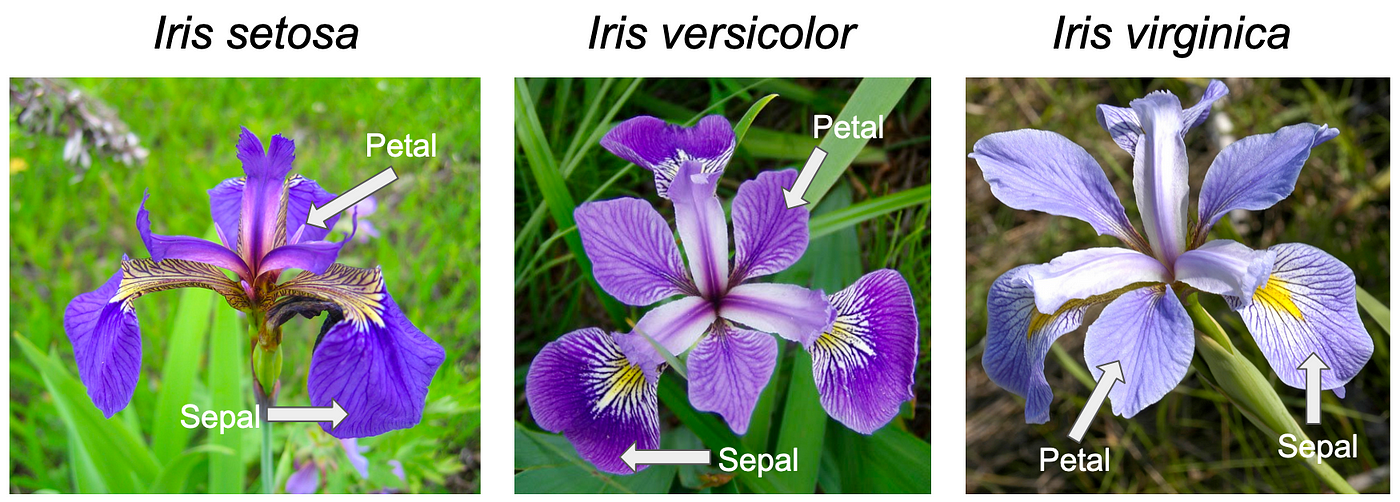

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
iris = pd.read_csv('IRIS.csv')
iris = iris.drop(columns=["sepal_length", "petal_length"])
# Print 3 examples of each species
for s in iris["species"].unique():
    print(f"\n{s}:")
    print(iris[iris["species"] == s].head(3))
    print("-" * 50)


Iris-setosa:
   sepal_width  petal_width      species
0          3.5          0.2  Iris-setosa
1          3.0          0.2  Iris-setosa
2          3.2          0.2  Iris-setosa
--------------------------------------------------

Iris-versicolor:
    sepal_width  petal_width          species
50          3.2          1.4  Iris-versicolor
51          3.2          1.5  Iris-versicolor
52          3.1          1.5  Iris-versicolor
--------------------------------------------------

Iris-virginica:
     sepal_width  petal_width         species
100          3.3          2.5  Iris-virginica
101          2.7          1.9  Iris-virginica
102          3.0          2.1  Iris-virginica
--------------------------------------------------


In [3]:
# input nodes
petal_width = iris["petal_width"].values
sepal_width = iris["sepal_width"].values

# Combine petal_width and sepal_width into a 2D array
X = np.column_stack((petal_width, sepal_width)) 


# output nodes
species = iris["species"].values
label_encoder = LabelEncoder()
# output nodes encoded as integers, setosa = 0, versicolor = 1, virginica = 2
species_encoded = label_encoder.fit_transform(species) 
y = species_encoded
print(y) 
print("\n" + "="* 80 + "\n")
print(X)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


[[0.2 3.5]
 [0.2 3. ]
 [0.2 3.2]
 [0.2 3.1]
 [0.2 3.6]
 [0.4 3.9]
 [0.3 3.4]
 [0.2 3.4]
 [0.2 2.9]
 [0.1 3.1]
 [0.2 3.7]
 [0.2 3.4]
 [0.1 3. ]
 [0.1 3. ]
 [0.2 4. ]
 [0.4 4.4]
 [0.4 3.9]
 [0.3 3.5]
 [0.3 3.8]
 [0.3 3.8]
 [0.2 3.4]
 [0.4 3.7]
 [0.2 3.6]
 [0.5 3.3]
 [0.2 3.4]
 [0.2 3. ]
 [0.4 3.4]
 [0.2 3.5]
 [0.2 3.4]
 [0.2 3.2]
 [0.2 3.1]
 [0.4 3.4]
 [0.1 4.1]
 [0.2 4.2]
 [0.1 3.1]
 [0.2 3.2]
 [0.2 3.5]
 [0.1 3.1]
 [0.2 3. ]
 [0.2 3.4]
 [0.3 3.5]
 [0.3 2.3]
 [0.2 3.2]
 [0.6 3.5]
 [0.4 3.8]
 [0.3 3. ]
 [0.2 3.8]
 [0.2 3.2]
 [0.2 3.7]
 [0.2 3.3]
 [1.4 3.2]
 [1.5 3.2]
 [1.5 3.1]
 [1.3 2.3]
 [1.5 2.8]
 [1.3 2.8]
 [1.6 3.3]
 [1.  2.4]
 [1.3 2.9]
 [1.4 2.7]
 [1.  2. ]
 [1.5 3. ]
 [1.  2.2]

In [4]:
# Normalize the input features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [5]:
# Convert data to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

print(X_tensor)
print(y_tensor)

tensor([[0.0417, 0.6250],
        [0.0417, 0.4167],
        [0.0417, 0.5000],
        [0.0417, 0.4583],
        [0.0417, 0.6667],
        [0.1250, 0.7917],
        [0.0833, 0.5833],
        [0.0417, 0.5833],
        [0.0417, 0.3750],
        [0.0000, 0.4583],
        [0.0417, 0.7083],
        [0.0417, 0.5833],
        [0.0000, 0.4167],
        [0.0000, 0.4167],
        [0.0417, 0.8333],
        [0.1250, 1.0000],
        [0.1250, 0.7917],
        [0.0833, 0.6250],
        [0.0833, 0.7500],
        [0.0833, 0.7500],
        [0.0417, 0.5833],
        [0.1250, 0.7083],
        [0.0417, 0.6667],
        [0.1667, 0.5417],
        [0.0417, 0.5833],
        [0.0417, 0.4167],
        [0.1250, 0.5833],
        [0.0417, 0.6250],
        [0.0417, 0.5833],
        [0.0417, 0.5000],
        [0.0417, 0.4583],
        [0.1250, 0.5833],
        [0.0000, 0.8750],
        [0.0417, 0.9167],
        [0.0000, 0.4583],
        [0.0417, 0.5000],
        [0.0417, 0.6250],
        [0.0000, 0.4583],
        [0.0

In [ ]:
class IrirsNetSimple(nn.Module):
    def __init__(self, input_size=2, hidden_size=2, output_size=3):
        super(IrirsNetSimple, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [6]:
# Define the neural network
class IrisNet(nn.Module):
    def __init__(self):
        super(IrisNet, self).__init__()
        # Initialize weights and biases for our custom linear layers
        self.weights1 = nn.Parameter(torch.randn(2, 2))
        self.bias1 = nn.Parameter(torch.randn(2))
        
        self.weights2 = nn.Parameter(torch.randn(3, 2))
        self.bias2 = nn.Parameter(torch.randn(3))
    
    def custom_relu(self, x):
        """Custom implementation of ReLU activation function"""
        return torch.max(torch.zeros_like(x), x)
    
    def custom_linear(self, x, weights, bias):
        """Custom implementation of linear transformation"""
        return torch.matmul(x, weights.t()) + bias
    
    def forward(self, x):
        # First layer with custom linear and ReLU
        x = self.custom_linear(x, self.weights1, self.bias1)
        x = self.custom_relu(x)
        
        # Second layer with custom linear
        x = self.custom_linear(x, self.weights2, self.bias2)
        return x


In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = IrisNet().to(device)

In [9]:
# Create grid and convert to tensor (ensure device is defined)
petal_width_range = np.linspace(0, 1, 50)
sepal_width_range = np.linspace(0, 1, 50)
petal_width_grid, sepal_width_grid = np.meshgrid(petal_width_range, sepal_width_range)
grid = np.column_stack((petal_width_grid.ravel(), sepal_width_grid.ravel()))
grid_tensor = torch.tensor(grid, dtype=torch.float32).to(device)

# Make predictions with your model and compute probabilities
model.eval()
with torch.no_grad():
    logits = model(grid_tensor)
    probabilities = torch.softmax(logits, dim=1).cpu().numpy()

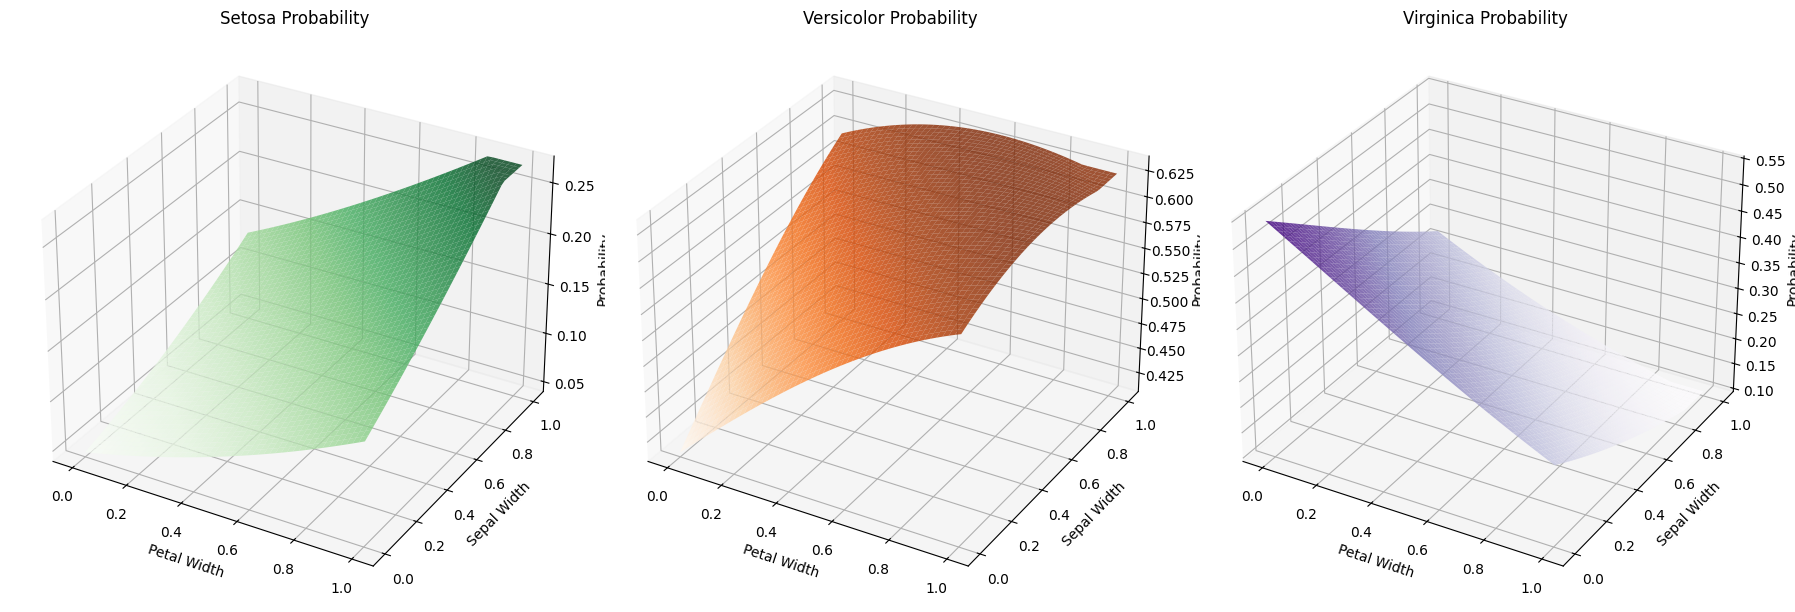

In [10]:
# Reshape probabilities for each class to match the grid shape
prob_setosa = probabilities[:, 0].reshape(petal_width_grid.shape)
prob_versicolor = probabilities[:, 1].reshape(petal_width_grid.shape)
prob_virginica = probabilities[:, 2].reshape(petal_width_grid.shape)

# Plot the 3D surfaces for each class
fig = plt.figure(figsize=(18, 6))

# Create lists for classes, probabilities, and color maps
classes = ['Setosa', 'Versicolor', 'Virginica']
prob_data = [prob_setosa, prob_versicolor, prob_virginica]
cmaps = ['Greens', 'Oranges', 'Purples']

# Create subplots in a loop
for i, (cls, prob, cmap) in enumerate(zip(classes, prob_data, cmaps)):
    ax = fig.add_subplot(1, 3, i+1, projection='3d')
    surf = ax.plot_surface(petal_width_grid, sepal_width_grid, prob, cmap=cmap, alpha=0.8)
    ax.set_title(f'{cls} Probability')
    ax.set_xlabel('Petal Width')
    ax.set_ylabel('Sepal Width')
    ax.set_zlabel('Probability')

plt.tight_layout()
plt.show()